## kernels using SVM. 
* Kernelized SVMs    
* Different Kernels
* Visualizing Kernels
* Visualizing degrees of polynomial kernels
* Comparing all classifiers learned so far

reference
* http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* https://web.stanford.edu/~hastie/Papers/svmtalk.pdf

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('../data/wine_original.csv')
labels = data['class']
del data['class']
X = data
y = labels

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [2]:
for k in ['rbf', 'poly', 'sigmoid']:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    acc = accuracy_score(y_pred, y_test)
    train_acc = accuracy_score(y_train_pred, y_train)
    print ('Training Accuracy with kernel:{} = {}'.format(k, train_acc))
    print ('Testing Accuracy with kernel:{} = {}'.format(k, acc))
    # Number of support vectors for each class
    print ('Number of support vectors for each class:\n',clf.n_support_ )
    print ('Support vectors shape:\n', clf.support_vectors_.shape)

Training Accuracy with kernel:rbf = 1.0
Testing Accuracy with kernel:rbf = 0.3333333333333333
Number of support vectors for each class:
 [42 60 40]
Support vectors shape:
 (142, 13)
Training Accuracy with kernel:poly = 1.0
Testing Accuracy with kernel:poly = 0.9722222222222222
Number of support vectors for each class:
 [5 7 7]
Support vectors shape:
 (19, 13)
Training Accuracy with kernel:sigmoid = 0.4225352112676056
Testing Accuracy with kernel:sigmoid = 0.3055555555555556
Number of support vectors for each class:
 [42 42 40]
Support vectors shape:
 (124, 13)


### Visualizing Different Kernels

In [3]:
def plot_boundary(ax, estimator, title, xfeature, yfeature, X_train, X_test):
    from matplotlib.colors import ListedColormap
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X_train[xfeature].min() - 1, X_train[xfeature].max() + 1
    y_min, y_max = X_train[yfeature].min() - 1, X_train[yfeature].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .008),
                        np.arange(y_min, y_max, .008))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X_train[xfeature], X_train[yfeature], c=y_train, cmap=cmap_bold)
    ax.scatter(X_test[xfeature], X_test[yfeature], c=y_test, marker='x', cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(xfeature, fontsize=10)
    ax.set_ylabel(yfeature, fontsize=10)
    ax.set_title(title, fontsize=10)

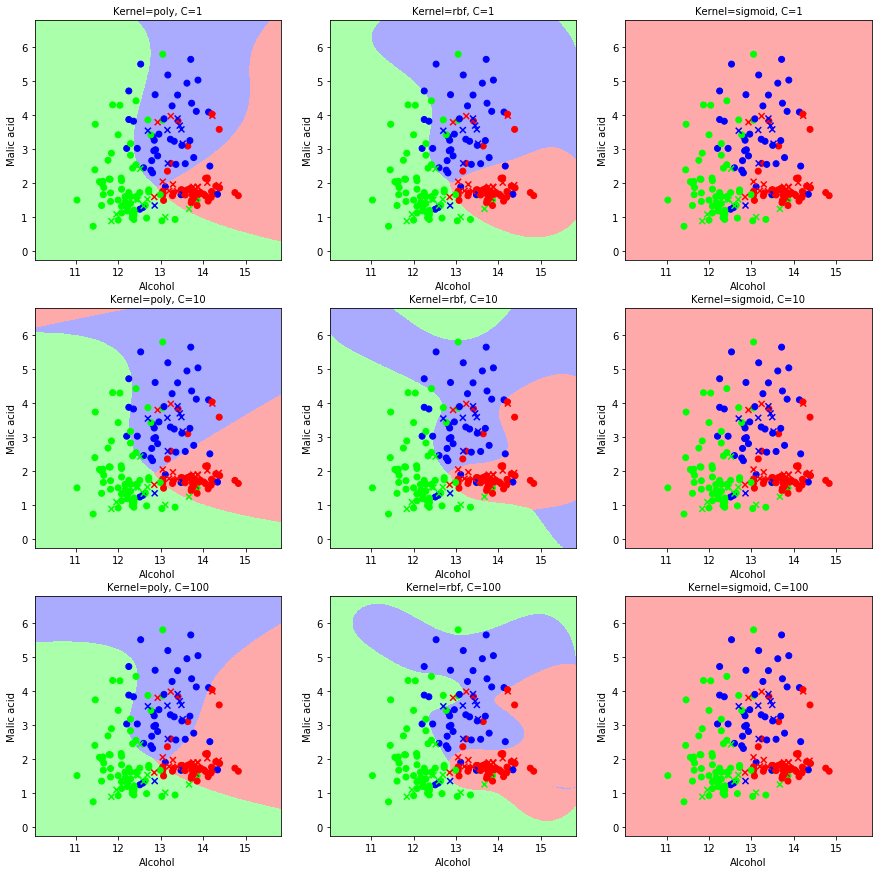

In [4]:
fig,ax = plt.subplots(3,3)
fig.set_size_inches(15, 15)

for i,C in enumerate([1,10,100]):
    for j,k in enumerate(['poly', 'rbf', 'sigmoid']):
        svc = SVC(C=C, kernel=k)
        svc.fit(X_train.iloc[:,:2], y_train)
        plot_boundary(ax[i,j], svc, 'Kernel={}, C={}'.format(k,C), X_train.columns[0], X_train.columns[1], X_train, X_test)
    
plt.show()

### Visualizing kernel poly with different degrees

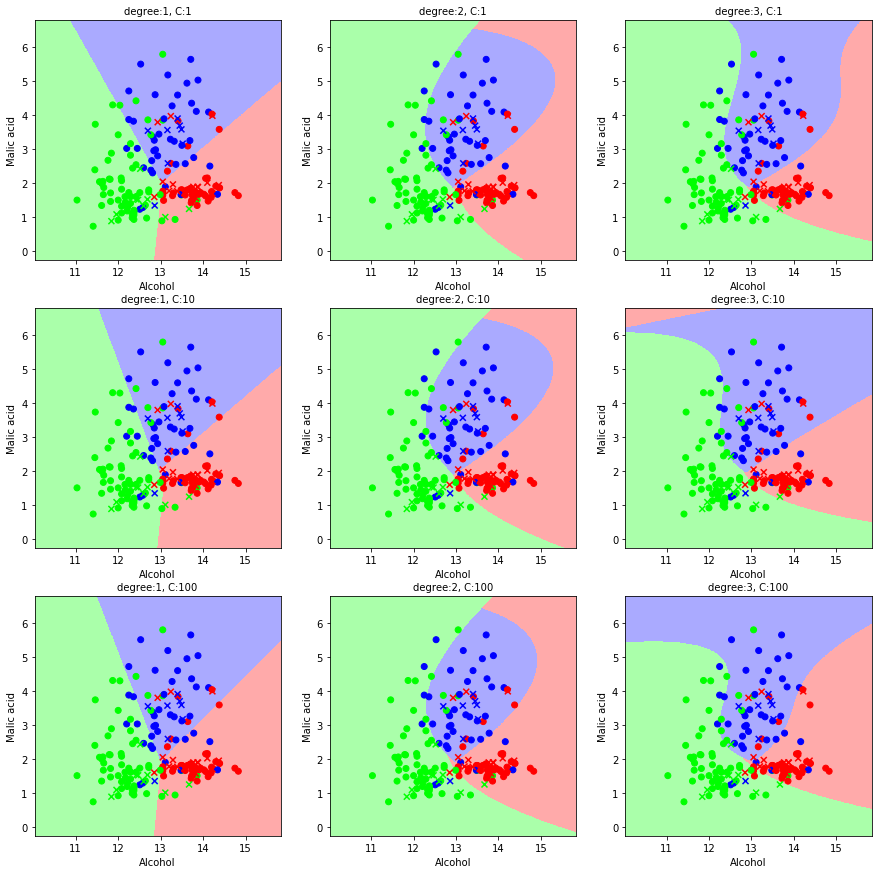

In [5]:
fig,ax = plt.subplots(3,3)
fig.set_size_inches(15, 15)

for i,C in enumerate([1,10,100]):
    for j,d in enumerate([1,2,3]):
        svc = SVC(C=C, kernel='poly', degree = d)
        svc.fit(X_train.iloc[:,:2], y_train)
        plot_boundary(ax[i,j], svc, 'degree:{}, C:{}'.format(d, C), X_train.columns[0], X_train.columns[1], X_train, X_test)
    
plt.show()

Comparing decision boundaries of all classifiers we have learned till now

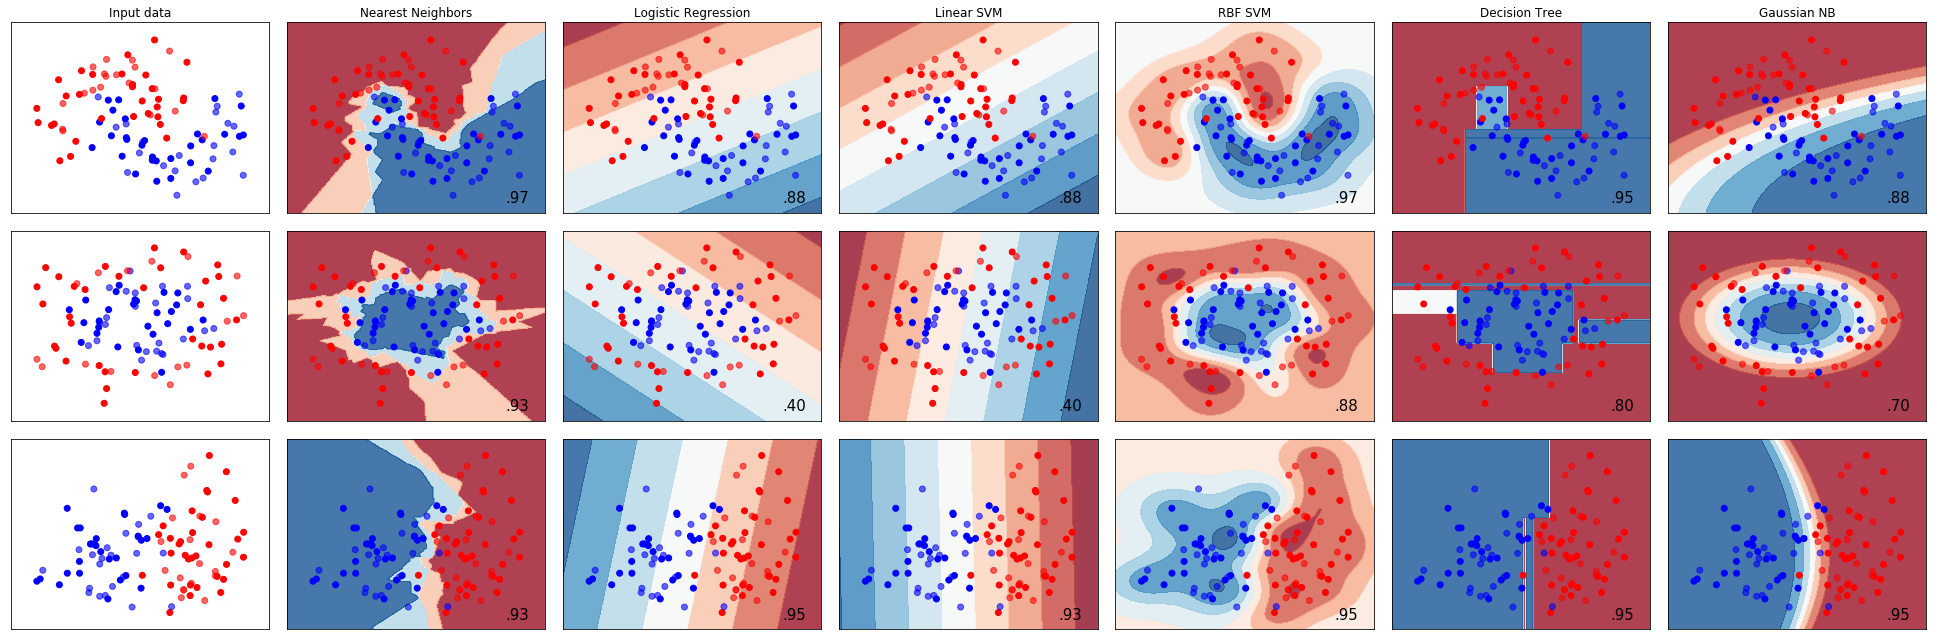

In [6]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

h = .02  # step size in the mesh

names = ["Nearest Neighbors", 'Logistic Regression', "Linear SVM", "RBF SVM", "Decision Tree", "Gaussian NB"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()